In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# baca dataset
df = pd.read_csv('K02_diabetes.csv', delimiter=',')
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2999,Female,31.0,0,0,never,44.76,4.5,130,0
12002,Female,38.0,0,0,No Info,29.26,3.5,155,0
77623,Male,46.0,1,0,never,22.55,6.1,100,0
37673,Female,40.0,0,0,No Info,37.58,5.7,159,1
92483,Male,69.0,0,0,former,28.45,4.0,155,0


In [53]:
# Loop untuk melihat nilai unik di setiap kolom kategorikal
for kolom in df.select_dtypes(include=['object']):
    unique_values = df[kolom].value_counts()
    print(f"Nilai unik dalam kolom '{kolom}':\n{unique_values}\n")

Nilai unik dalam kolom 'gender':
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Nilai unik dalam kolom 'smoking_history':
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64



In [54]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [55]:
# data preprocessing

# cek null value
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [56]:
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  3854


In [57]:
# Hapus data duplikat
df = df.drop_duplicates()

# cek kembali
print("Jumlah data duplikasi: ", df.duplicated().sum())

Jumlah data duplikasi:  0


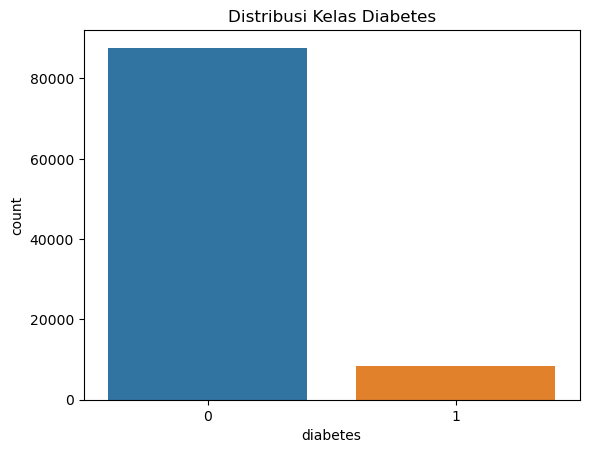

In [58]:
# lihat distribusi data
sns.countplot(x='diabetes', data=df)
plt.title('Distribusi Kelas Diabetes')
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder

# Lakukan label encoding pada kolom 'gender' dan 'smoking_history'
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [60]:
# tampilkan korelasi fitur dengan target
correlation = df.corr()
correlation

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028968,0.014007,0.078312,-0.079239,-0.023461,0.019836,0.017830,0.037613
age,-0.028968,1.000000,0.257305,0.238451,0.241128,0.344797,0.106719,0.114317,0.264927
hypertension,0.014007,0.257305,1.000000,0.119982,0.087892,0.148111,0.081441,0.084834,0.195710
heart_disease,0.078312,0.238451,0.119982,1.000000,0.023608,0.061376,0.068140,0.070832,0.170711
smoking_history,-0.079239,0.241128,0.087892,0.023608,1.000000,0.183840,0.035518,0.038259,0.088471
bmi,-0.023461,0.344797,0.148111,0.061376,0.183840,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.019836,0.106719,0.081441,0.068140,0.035518,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.017830,0.114317,0.084834,0.070832,0.038259,0.092543,0.171615,1.000000,0.424336
diabetes,0.037613,0.264927,0.195710,0.170711,0.088471,0.214932,0.406408,0.424336,1.000000


In [61]:
# melihat korelasi fitur dan target
class_corr = correlation['diabetes']  

# urutkan hasil korelasi
sorted_feature = class_corr.abs().sort_values(ascending=False)
print(sorted_corr)

diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoking_history        0.088471
gender                 0.037613
Name: diabetes, dtype: float64


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Pisahkan fitur dengan target
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

# Bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Test Accuracy: 0.9500416031063653
Test Precision: 0.9512460087205559
Test Recall: 0.9500416031063653
Test F1-Score: 0.950598321409347
Confusion Matrix:
[[25481   786]
 [  655  1922]]


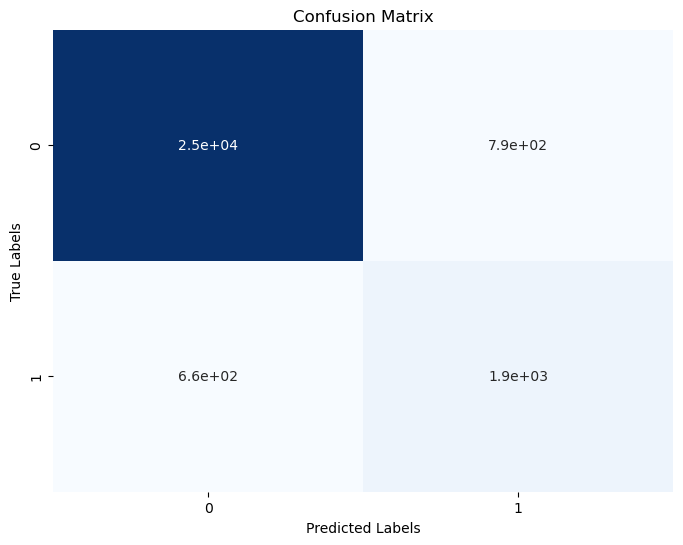

In [63]:
# Inisialisasi model decision tree
dt_model = DecisionTreeClassifier()

# Latih model 
dt_model.fit(X_train, y_train)

# Prediksi model pada data test
test_predictions = dt_model.predict(X_test)

# Evaluasi performa model pada data test
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

# Cetak confusion matrix pada data test
confusion_mat = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(confusion_mat)

# Mencetak confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [64]:
# Ambil contoh 10 data tes untuk diuji
X_test_subset = X_test.head(10)

# Lakukan prediksi pada data tes
y_pred_head = dt_model.predict(X_test_subset)

# Buat DataFrame untuk menampilkan hasil prediksi
result_df = pd.DataFrame({
    'Features': X_test_subset.values.tolist(),
    'True Class': y_test.head(10).values,
    'Predicted Class': y_pred_head
})

# Tampilkan DataFrame
result_df

,Features,True Class,Predicted Class
0,"[0.0, 5.0, 0.0, 0.0, 0.0, 15.14, 4.5, 90.0]",0,0
1,"[1.0, 19.0, 0.0, 0.0, 4.0, 22.74, 6.6, 85.0]",0,0
2,"[0.0, 52.0, 0.0, 0.0, 4.0, 24.27, 7.5, 220.0]",1,1
3,"[1.0, 55.0, 0.0, 0.0, 0.0, 27.32, 5.7, 85.0]",0,0
4,"[0.0, 22.0, 0.0, 0.0, 4.0, 28.78, 4.5, 200.0]",0,0
5,"[0.0, 71.0, 0.0, 0.0, 0.0, 29.05, 3.5, 126.0]",0,0
6,"[1.0, 62.0, 0.0, 0.0, 3.0, 27.32, 3.5, 158.0]",0,0
7,"[1.0, 6.0, 0.0, 0.0, 0.0, 22.88, 5.7, 80.0]",0,0
8,"[0.0, 62.0, 0.0, 0.0, 0.0, 20.19, 6.5, 85.0]",0,0
9,"[0.0, 18.0, 0.0, 0.0, 4.0, 20.97, 4.0, 160.0]",0,0
